In [1]:
from mxnet import autograd,nd
import gluonbook as gb

In [2]:
batch_size=256
train_iter,test_iter=gb.load_data_fashion_mnist(batch_size)

In [3]:
num_inputs=28*28
num_outputs=10
W=nd.random.normal(scale=0.01,shape=(num_inputs,num_outputs))
b=nd.zeros(num_outputs)

In [4]:
W.attach_grad()
b.attach_grad()


In [5]:
def softmax(X):
    Xexp=X.exp()
    return Xexp/Xexp.sum(axis=1,keepdims=True)

In [6]:
X=nd.random.normal(shape=(2,5))
X_prob=softmax(X)
X_prob,X_prob.sum(axis=1,keepdims=True)

(
 [[0.21324193 0.33961776 0.1239742  0.27106097 0.05210521]
  [0.11462264 0.3461234  0.19401033 0.29583326 0.04941036]]
 <NDArray 2x5 @cpu(0)>, 
 [[1.0000001]
  [1.       ]]
 <NDArray 2x1 @cpu(0)>)

In [7]:
def net(X):
    return softmax(nd.dot(X.reshape(-1,num_inputs),W)+b)

In [8]:
def cross_entropy(y_hat,y):
    return -nd.mean(nd.pick(y_hat.log(),y))

In [9]:
def accuracy(y_hat,y):
    return (y_hat.argmax(axis=1)==y.astype('float32')).mean()

In [10]:
def evaluate_accuracy(data_iter,net):
    acc=0
    for X ,y in data_iter:
        acc+=accuracy(net(X),y)
    return acc/len(data_iter)


In [11]:
evaluate_accuracy(test_iter,net)


[0.09472656]
<NDArray 1 @cpu(0)>

In [12]:
num_epochs=5
lr=0.1
def train(net,train_iter,test_iter,loss,num_epochs,batch_size,params=None,lr=None,trainer=None):
    for epoch in range(num_epochs):
        train_l_sum=0
        train_acc_sum=0
        for X,y in train_iter:
            with autograd.record():
                y_hat=net(X)
                l=loss(y_hat,y)
            l.backward()
            gb.sgd(params,lr,batch_size)
            train_l_sum+=l
            train_acc_sum+=accuracy(y_hat,y)
        test_acc=evaluate_accuracy(test_iter,net)
        print('epoch %d,loss %.4f,train acc %.3f,test acc %.3f'%(epoch,(train_l_sum/len(train_iter)).asscalar(),(train_acc_sum/len(train_iter)).asscalar(), test_acc.asscalar()))
train(net,train_iter,test_iter,cross_entropy,num_epochs,batch_size,[W,b],lr)    

epoch 0,loss 2.2068,train acc 0.235,test acc 0.389
epoch 1,loss 2.0364,train acc 0.490,test acc 0.571
epoch 2,loss 1.9010,train acc 0.601,test acc 0.626
epoch 3,loss 1.7881,train acc 0.636,test acc 0.643
epoch 4,loss 1.6925,train acc 0.648,test acc 0.650


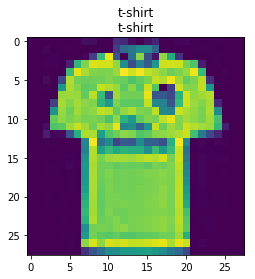

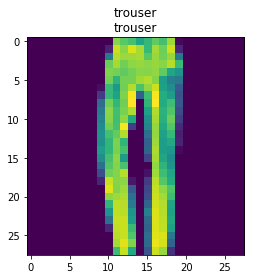

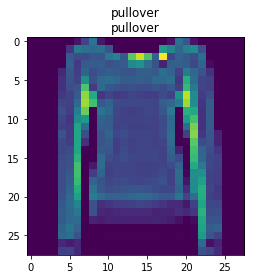

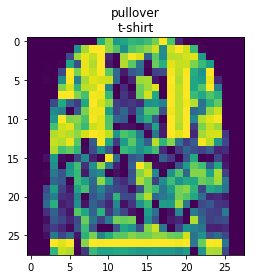

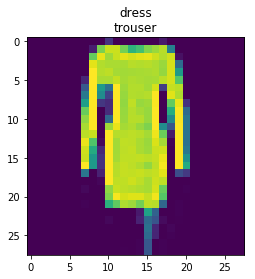

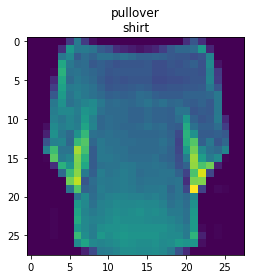

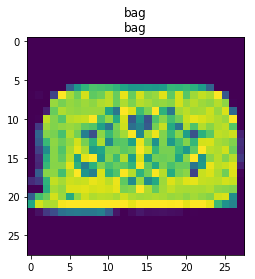

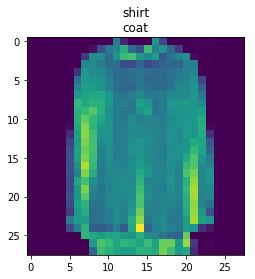

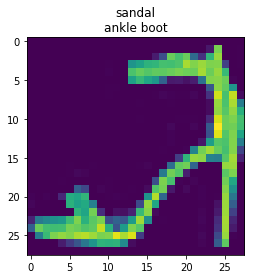

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
for X,y in test_iter:
    break
true_labels=gb.get_fashion_mnist_labels(y.asnumpy())
pred_labels=gb.get_fashion_mnist_labels(net(X).argmax(axis=1).asnumpy())
title=[true+'\n'+pred for true , pred in zip(true_labels,pred_labels)]
for image , label in zip(X[:9],title[:9]):
    plt.figure()
    plt.imshow(image.asnumpy()[0,:,:])
    plt.title(label)